In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def batch_convergence(old_val, current_val, threshold):
    if abs(old_val - current_val)/old_val * 100 < threshold:
        return False
    else:
        return True

In [3]:
def compute_delta(previous_delta, old_val, current_val):
    return 0.5 * previous_delta + 0.5 * (abs(old_val - current_val)/old_val * 100)

In [4]:
def data_generator(feature_file, target_file):
    with open(feature_file) as feature_fh, open(target_file) as target_fh: 
        for X, y in zip(feature_fh, target_fh):
            x = np.array([int(x) for x in (X.strip()).split(',')])
            y = int(y.strip())
            yield x, y

In [5]:
def compute_value(W, b, feature_file, target_file):
    RuLu = 0
    for x, y in data_generator(feature_file, target_file):
        RuLu += max(0, 1 - y*(W.dot(x) + b))
    return 1/2 * np.sum(W**2) + C * RuLu

In [6]:
feature_file = 'features.txt'
target_file = 'target.txt'

<IPython.core.display.Javascript object>


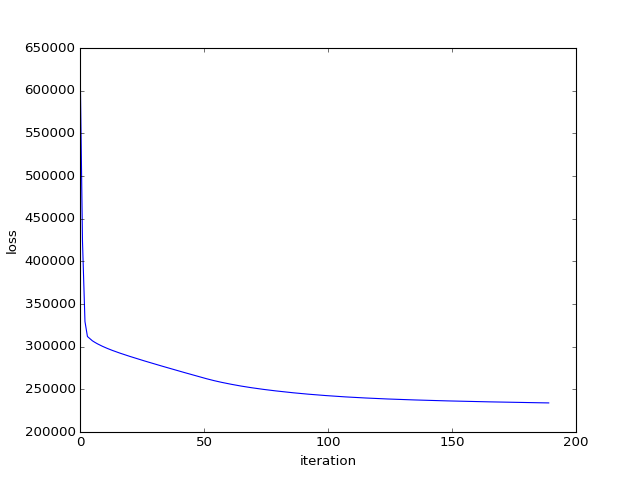

In [21]:
# Batch Gradient Descent
C = 100
d = 122
eta = 0.0000003
eps = 0.02
W = np.zeros(d)
b = 0

old_val = 1
current_val = compute_value(W, b, feature_file, target_file)
loss_list = list()
while batch_convergence(old_val, current_val, eps):
    W_grad = np.zeros(d)
    b_grad = 0
    for x, y in data_generator(feature_file, target_file):
        if y * (x.dot(W) + b) < 1:
            W_grad += -y*x
            b_grad += -y
    
    W = W - eta * (C * W_grad + W)
    b = b - eta * b_grad
    
    old_val = current_val
    current_val = compute_value(W, b, feature_file, target_file)
    loss_list.append(current_val)

fig1 = plt.figure()
plt.plot(loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

16035003.3317
8017505.88823
4008755.01019
2004378.53056
1002189.79402
501095.250583
250547.864632
125274.115401
62637.2050616
31318.7225838
15659.4659495
7829.81878752
3914.98775873
1957.55811704
978.83359781
489.468139367
244.780671651
122.432255994
61.2515461421
30.6552985774
15.3621478523
7.70996680541
3.88304000913
1.96386582755
1.00242251723
0.520338680472
0.278173758264
0.156553222923
0.0953470903646
0.0628783970056
0.0454835918427
0.0345432716581
0.0292689752768
0.0252269262314
0.0230894405005
0.0189060128114
0.0184224358745
0.0166515098305
0.0151275755316
0.0147887436648
0.0134530893096
0.0104412564086
0.0135039371682
0.0110535857134
0.0112310666907
0.00925288018807


<IPython.core.display.Javascript object>


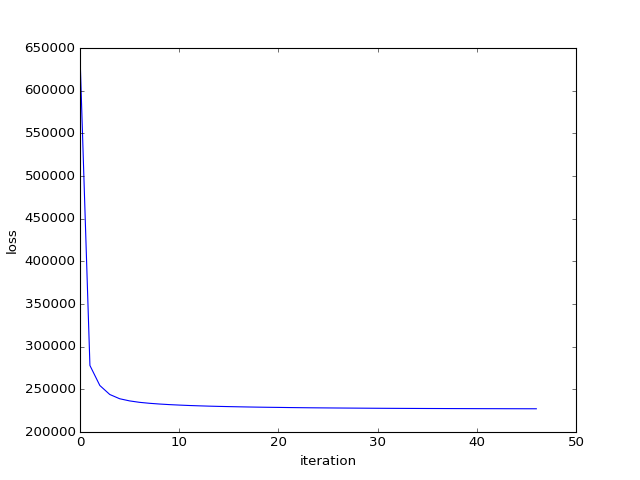

In [20]:
# Stochastic gradient descent
C = 100
d = 122
eta = 0.00001
eps = 0.01
W = np.zeros(d)
b = 0

current_val = compute_value(W, b, feature_file, target_file)
loss_list = list()
delta = compute_delta(0, 1, current_val)

while delta > eps:
    for x, y in data_generator(feature_file, target_file):
        if y * (x.dot(W) + b) < 1:
            W_grad = C * (-y*x) + W
            b_grad = -y
            W = W - eta * W_grad
            b = b - eta * b_grad
            
    old_val = current_val
    current_val = compute_value(W, b, feature_file, target_file)
    loss_list.append(current_val)
    delta = compute_delta(delta, old_val, current_val)
    print(delta)

fig2 = plt.figure()
plt.plot(loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

16035003.3677
8017506.05731
4008755.16542
2004378.55194
1002189.7928
501095.230597
250547.854204
125274.114154
62637.219643
31318.7318632
15659.4858878
7829.8331764
3914.99589008
1957.56816984
978.845981928
489.481101247
244.793624058
122.445596098
61.2673913648
30.6705851817
15.3745208111
7.71051201502
3.88673330404
1.97392031175
1.00304458528
0.531731314892
0.288076925676
0.161642463403
0.100250576183
0.063735551633
0.0581109936102
0.0481206050098
0.0339994221954
0.0381238890156
0.034123483223
0.0231439809896
0.0349389706003
0.0296016912323
0.0289880474389
0.0167060793659
0.035313696789
0.0317193499156
0.0202050233003
0.0263030975318
0.0252251960411
0.014656985401
0.0281054468196
0.0236479483087
0.0205174020036
0.0110386193715
0.0229864945275
0.0161884549038
0.00915736720788


<IPython.core.display.Javascript object>


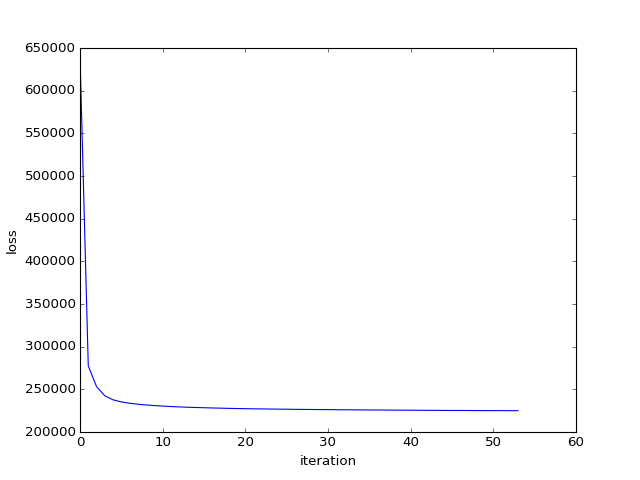

In [23]:
# Stochastic gradient descent
C = 100
d = 122

eta = 0.00001
eps = 0.01
W = np.zeros(d)
b = 0
batch_size = 20

current_val = compute_value(W, b, feature_file, target_file)
loss_list = list()
batch_count = 0
delta = compute_delta(0, 1, current_val)

W_grad = np.zeros(d)
b_grad = 0

while delta > eps:
    for x, y in data_generator(feature_file, target_file):
        batch_count += 1
        if y * (x.dot(W) + b) < 1:
            W_grad += -y*x
            b_grad += -y
        if batch_count == batch_size:
            W = W - eta * (C * W_grad + W)
            b = b - eta * b_grad
            
            W_grad = np.zeros(d)
            b_grad = 0
            batch_count = 0
    
    old_val = current_val
    current_val = compute_value(W, b, feature_file, target_file)
    loss_list.append(current_val)
    delta = compute_delta(delta, old_val, current_val)
    print(delta)

fig3 = plt.figure()   
plt.plot(loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()